# Matríz de confusión y recuperación de parámetros

### Índice

    -Matriz de confusión (BIC)
    -Recuperación y convergencia de parámetros. Estudio del modelo bayesiano a partir de las tasas de actualización del modelo de R-W asimétrico
    
## Repaso: Modelo Rescorla-Wagner asimétrico

$$
Q_M(t+1) = Q_M(t) + \begin{cases} 
      \alpha_+\left(r(t) - Q_M(t)\right) & \text{si } r(t)=1 \\
      \alpha_-\left(r(t) - Q_M(t)\right) & \text{no } r(t)=0 \\ 
   \end{cases}
$$

donde $Q_M(t)$ es la probabilidad de éxito de la máquina $M$ al trial $t$, $r(t)$ es la recompensa en el trial $t$ por haber elegido la máquina $M$ y $\alpha_\pm$ son las tasas de actualización asimétricas.

In [24]:
# Importo las librerías para graficar
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import numpy as np

## Matríz de confusión

$$BIC = -2log(likelihood) + klog(N)$$

donde $likelihood$ es el valor del posterior evaluada en los parámetros que la maximizan, $k$ es la cantidad de parámetros del modelo y $N$ es la cantidad de datos. $log$ es el logaritmo natural.

A continuación se muestran los **términos no diagonales** (modelos cruzados):

\begin{pmatrix}
 & * \\
* &  
\end{pmatrix}

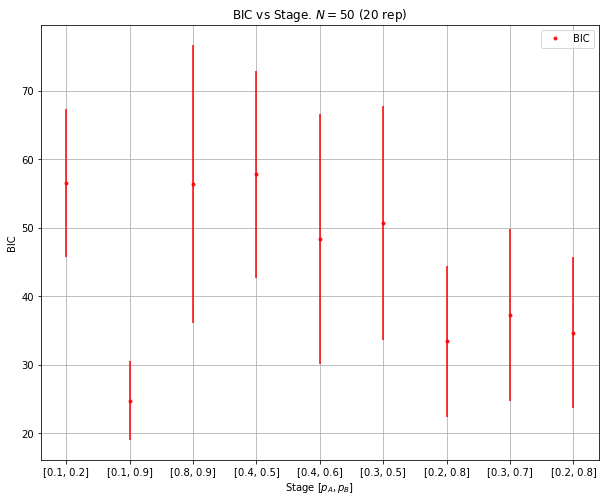

In [78]:
# Cargo los datos de las simulaciones y grafico los BICs
# Genero con bayes + Thompson sampling y ajusto con RW asimétrico

arrays = np.load('/home/Tomas/Escritorio/Bandit/pyMC3/Datos_simulados/BIC_bayes_RLas_N50_9_esc(20 rep).npz')

dataprom = arrays['arr_0']
BICs = arrays['arr_1']
resultados = arrays['arr_2']

BICprom = BICs.mean(axis=0)
BICstd = BICs.std(axis=0, ddof=1)

# Escenarios de las simuaciones
p_r_list=[[.1, .2], [.1, .9], [.8, .9], [.4, .5], [.4, .6], [.3, .5], [.2, .8], [.3, .7], [.2, .8]]

np_r = len(p_r_list)

n = 50 # número de trials

total = 20 # repeticiones por escenario para promediar

figsize(10, 8)

#BICs en función del escenario

plt.figure()

ax = plt.subplot(111)

dom = np.arange(0,len(BICprom))

plt.plot(dom, BICprom,'r.', alpha=0.85, label=r'BIC')
plt.errorbar(dom, BICprom, BICstd, fmt='none', ecolor='red')
# plt.plot(alphas, alphas, 'k--', alpha=0.3)
plt.xticks(ticks=dom, labels=p_r_list)
plt.legend(loc="upper right")
plt.xlabel(r'Stage $[p_A, p_B]$')
plt.ylabel(r'BIC')
plt.title(r"BIC vs Stage. $N=%i$ (%i rep)"%(n, total))
plt.grid()
#plt.savefig('BIC_vs_Stage_bayes_RLas_N%i_%i_esc(%i rep)'%(n, np_r, total), dpi=400)

### Genero con bayes + Thompson sampling y ajusto con RW asimétrico

A pesar de que estamos usando la librería pyMC3 que está súper optimizada, los BICs son altos para este caso. Esto indicaría que el modelo de R-W asimétrico no es muy bueno para ajustar este tipo de simulaciones con un agente bayesiano + Thompson sampling lo cual es un poco raro, no? 

Por otro lado, los valores de $\alpha_\pm$ que se obtienen siguen la intuición que teníamos de pesimista y optimista. 

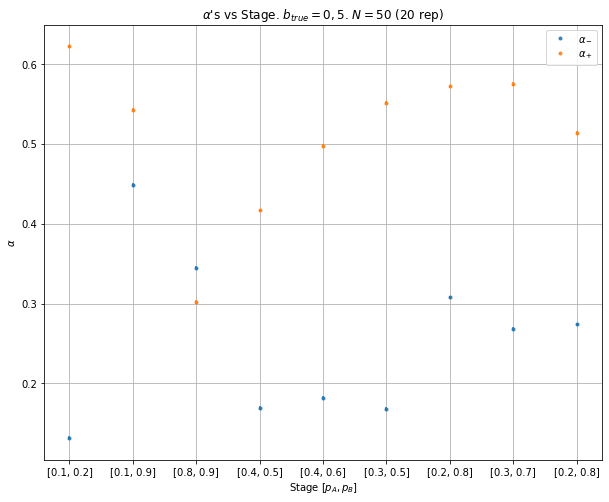

In [88]:
# Veamos qué valores se obtuvieron para los parámetros en los distintos escenarios
# b_{true} = 0.5
dprom = dataprom.mean(axis=2)

parprom = dprom[:,0,:]
parstd = dprom[:,1,:]/np.sqrt(total)

npar = len(parprom[:,0])

labels = [r'$\beta$',r'$\alpha_-$', r'$\alpha_+$']

plt.figure()

for i in range(2):
    plt.plot(dom, parprom[i+1,:],'.', color = 'C%i'%i, alpha=0.85, label=labels[i+1])
    plt.errorbar(dom, parprom[i+1,:], parstd[0,:], fmt='none', ecolor = 'C%i'%i)
# plt.plot(alphas, alphas, 'k--', alpha=0.3)
plt.xticks(ticks=dom, labels=p_r_list)
plt.legend(loc="upper right")
plt.xlabel(r'Stage $[p_A, p_B]$')
plt.ylabel(r'$\alpha$')
plt.title(r"$\alpha$'s vs Stage. $b_{true} = 0,5$. $N=%i$ (%i rep)"%(n, total))
plt.grid()



In [79]:
dataprom.shape #[par, stat, total, escenario]

(3, 2, 20, 9)

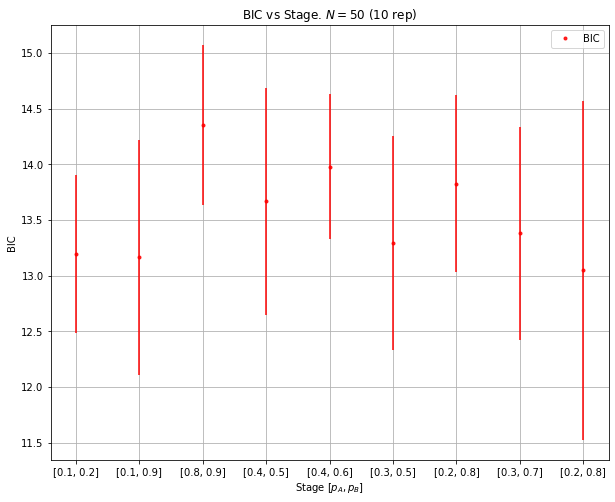

In [76]:
# Cargo los datos de las simulaciones y grafico los BICs
# Genero con RW asimétrico y ajusto con bayes + Thompson sampling

arrays = np.load('/home/Tomas/Escritorio/Bandit/pyMC3/Datos_simulados/BIC_RLas_bayes_N50_9_esc(10 rep)asd.npz')

dataprom = arrays['arr_0']
BICs = arrays['arr_1']
resultados = arrays['arr_2']

BICprom = BICs.mean(axis=0)
BICstd = BICs.std(axis=0, ddof=1)

# Escenarios de las simuaciones
p_r_list=[[.1, .2], [.1, .9], [.8, .9], [.4, .5], [.4, .6], [.3, .5], [.2, .8], [.3, .7], [.2, .8]]

np_r = len(p_r_list)

n = 50 # número de trials

total = 10 # repeticiones por escenario para promediar

figsize(10, 8)

#BICs en función del escenario

plt.figure()

ax = plt.subplot(111)

dom = np.arange(0,len(BICprom))

plt.plot(dom, BICprom,'r.', alpha=0.85, label=r'BIC')
plt.errorbar(dom, BICprom, BICstd, fmt='none', ecolor='red')
# plt.plot(alphas, alphas, 'k--', alpha=0.3)
plt.xticks(ticks=dom, labels=p_r_list)
plt.legend(loc="upper right")
plt.xlabel(r'Stage $[p_A, p_B]$')
plt.ylabel(r'BIC')
plt.title(r"BIC vs Stage. $N=%i$ (%i rep)"%(n, total))
plt.grid()
#plt.savefig('BIC_vs_Stage_RLas_bayes_N%i_%i_esc(%i rep)'%(n, np_r, total), dpi=400)

### Genero con RW asimétrico y ajusto con bayes + Thompson sampling

En este caso obtenemos valores del BIC mucho más chicos, lo cual indicaría que el modelo bayesiano es un buen modelo para ajustar este tipo de simulaciones de un agente R-W asimétrico. 

Recupera bien los parámetros y estos corresponden a la intuición de optimista y pesimista que teníamos.

In [72]:
dataprom.shape

(2, 2, 10)

In [ ]:
# Veamos qué valores se obtuvieron para los parámetros en los distintos escenarios

# Escenarios de las simuaciones
p_r_list=[[.1, .2], [.1, .9], [.8, .9], [.4, .5], [.4, .6], [.3, .5], [.2, .8], [.3, .7], [.2, .8]]

np_r = len(p_r_list)

n = 50 # número de trials

total = 10 # repeticiones por escenario para promediar

dprom = dataprom.mean(axis=2)

parprom = dprom[:,0,:]
parstd = dprom[:,1,:]/np.sqrt(total)

plt.figure()

plt.plot(dom, parprom,'r.', alpha=0.85, label=r'BIC')
plt.errorbar(dom, parprom, parstd, fmt='none', ecolor='red')
# plt.plot(alphas, alphas, 'k--', alpha=0.3)
plt.xticks(ticks=dom, labels=p_r_list)
plt.legend(loc="upper right")
plt.xlabel(r'Stage $[p_A, p_B]$')
plt.ylabel(r'BIC')
plt.title(r"BIC vs Stage. $N=%i$ (%i rep)"%(n, total))
plt.grid()

A continuación se muestran los **términos diagonales** (el mismo modelo genera y ajusta):

\begin{pmatrix}
* &  \\
 & *
\end{pmatrix}

In [77]:
# Cargo los datos de las simulaciones y grafico los BICs
# Genero con RW asimétrico y ajusto con RW asimétrico

arrays = np.load('/home/Tomas/Escritorio/Bandit/pyMC3/Datos_simulados/BIC_RLas_RLas_N50_4_esc(10 rep).npz')

dataprom = arrays['arr_0']
BICs = arrays['arr_1']
resultados = arrays['arr_2']

BICprom = BICs.mean(axis=0)
BICstd = BICs.std(axis=0, ddof=1)

# Escenarios de las simuaciones
p_r_list=[[.1, .2], [.1, .9], [.8, .9], [.4, .5], [.4, .6], [.3, .5], [.2, .8], [.3, .7], [.2, .8]]

np_r = 4 #len(p_r_list)

n = 50 # número de trials

total = 10 # repeticiones por escenario para promediar

figsize(10, 8)

#BICs en función del escenario

plt.figure()

ax = plt.subplot(111)

dom = np.arange(0,len(BICprom))

plt.plot(dom, BICprom,'r.', alpha=0.85, label=r'BIC')
plt.errorbar(dom, BICprom, BICstd, fmt='none', ecolor='red')
# plt.plot(alphas, alphas, 'k--', alpha=0.3)
plt.xticks(ticks=dom, labels=p_r_list)
plt.legend(loc="upper right")
plt.xlabel(r'Stage $[p_A, p_B]$')
plt.ylabel(r'BIC')
plt.title(r"BIC vs Stage. $N=%i$ (%i rep)"%(n, total))
plt.grid()
#plt.savefig('BIC_vs_Stage_RLas_bayes_N%i_%i_esc(%i rep)'%(n, np_r, total), dpi=400)

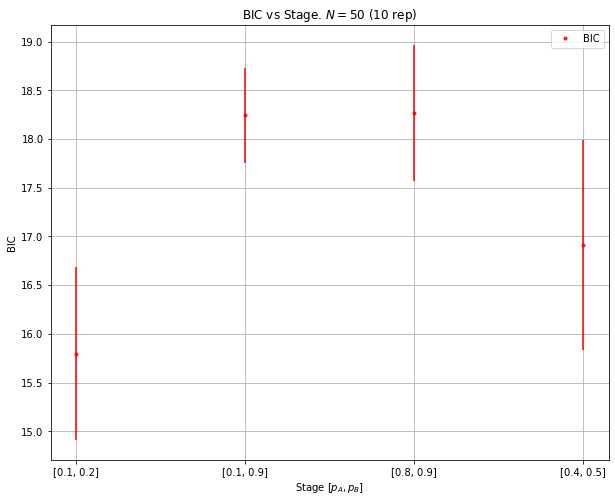

In [23]:
# Cargo los datos de las simulaciones y grafico los BICs
# Genero con bayes + Thompson sampling y ajusto con bayes + Thompson sampling

arrays = np.load('/home/Tomas/Escritorio/Bandit/pyMC3/Datos_simulados/BIC_bayes_bayes_N50_4_esc(10 rep).npz')

dataprom = arrays['arr_0']
BICs = arrays['arr_1']
resultados = arrays['arr_2']

BICprom = BICs.mean(axis=0)
BICstd = BICs.std(axis=0, ddof=1)

# Escenarios de las simuaciones
p_r_list=[[.1, .2], [.1, .9], [.8, .9], [.4, .5], [.4, .6], [.3, .5], [.2, .8], [.3, .7], [.2, .8]]

np_r = 4 #len(p_r_list)

n = 50 # número de trials

total = 10 # repeticiones por escenario para promediar

figsize(10, 8)

#BICs en función del escenario

plt.figure()

ax = plt.subplot(111)

dom = np.arange(0,len(BICprom))

plt.plot(dom, BICprom,'r.', alpha=0.85, label=r'BIC')
plt.errorbar(dom, BICprom, BICstd, fmt='none', ecolor='red')
# plt.plot(alphas, alphas, 'k--', alpha=0.3)
plt.xticks(ticks=dom, labels=p_r_list)
plt.legend(loc="upper right")
plt.xlabel(r'Stage $[p_A, p_B]$')
plt.ylabel(r'BIC')
plt.title(r"BIC vs Stage. $N=%i$ (%i rep)"%(n, total))
plt.grid()
#plt.savefig('BIC_vs_Stage_RLas_bayes_N%i_%i_esc(%i rep)'%(n, np_r, total), dpi=400)

## Recuperación y convergencia de parámetros. Estudio del modelo bayesiano a partir de las tasas de actualización del modelo de R-W asimétrico

A continuación se muestra evolución de los parámetros ajustados en función del tiempo para el caso en el que los datos simulados son generados a partir de un modelo bayesiano y el ajuste se hace mediante el modelo de RW asimétrico.

In [51]:
datatot = np.load('/home/Tomas/Escritorio/Bandit/pyMC3/Datos_simulados/bayes_bayes_N100_9_esc(20 rep).npz')['arr_0']

# datatot = np.zeros((2,n,total,np_r))

data = datatot.mean(axis=2)

p_r_list=[[.1, .2], [.1, .9], [.8, .9], [.4, .5], [.4, .6], [.3, .5], [.2, .8], [.3, .7], [.2, .8]]

np_r = len(p_r_list)

figsize(10, 8)

#histogram of alphas

n = 100

total = 10

trials = np.arange(1,n+1)

b = 0.4

plt.figure()

ax = plt.subplot(111)

plt.xlim(0, n+1)
for escenario in range(np_r):
    
    plt.plot(trials, data[0,:,escenario],'.-', color = 'C%i'%escenario ,alpha=0.85, label=r'$[p_A, p_B] = {}$'.format(p_r_list[escenario]))
    plt.errorbar(trials, data[0,:,escenario], data[1,:,escenario]/np.sqrt(total), fmt='none', color = 'C%i'%escenario, alpha=0.05)
plt.hlines(b, trials[0], n+1, ls='dashed', label=r'$b_{true}$')
plt.legend(loc="upper right")
plt.xlabel(r'$N$')
plt.ylabel(r'$b$ fit')
plt.title(r"$b$'s fiteados vs trials. $N=%i$ (%i rep)"%(n, total))
# plt.savefig('BIC_bayes_RLas_N%i_%i_esc(%i rep)'%(n, np_r, total), dpi=400)

Text(0.5, 1.0, "$b$'s fiteados vs trials. $N=100$ (10 rep)")

In [58]:
print('El error estándar promedio es de:')
data[1,:,:].mean(axis=(0,1))/np.sqrt(total)


El error estándar promedio es de:


0.05396900896262031

Falta la evolución de los parámetros del modelo R-W asimétrico al ajustar datos generados con el modelo bayesiano + Thompson sampling (simulación larga en proceso)